In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# %matplotlib widget 

import numpy as np
from functools import partial
# from pdb import set_trace

from update_2d import update_w
from plot_custom import plot_all
from landscape_loss import landscape

In [3]:
def run_exp(fnc, w0, qs, lrs, momentums = None, iter = 100):
    w_alls = []; l_alls = []; w_mins = []; w_maxs = []
    
    if momentums is None: 
        momentums = np.zeros(len(qs))
        
    for q, lr, m in zip(qs, lrs, momentums):
        w = w0.copy()
        w_all = [w.copy()]
        v = 0 
        for _ in range(iter):
            loss, err, jac = fnc(w)
            v =  m * v + (1-m) * update_w(w, err, jac, q=q) 
            w -= lr * v
            w_all.append(w.copy())

        w_all = np.stack(w_all,axis=1)
        l_all, _, _ = fnc(w_all)
        w_alls.append(w_all);        l_alls.append(l_all);        w_mins.append(w_all.min(axis=1));        w_maxs.append(w_all.max(axis=1))
        
    return l_alls, w_alls, (w_mins, w_maxs)

def print_str():
    legend = ['SGD', 'NGD', 'sNGD']
    for q in qs[3:]:
        legend.append('q = '+str(q))
    print('w0 = ', w0, ' lr = ', lrs, ' noise = ', eps, ' seed = ', seed)
    
    return legend

# Play time!!

w0 =  [-8.76138052  5.84498705]  lr =  [0.0004 0.015  0.0075]  noise =  0.1  seed =  5385


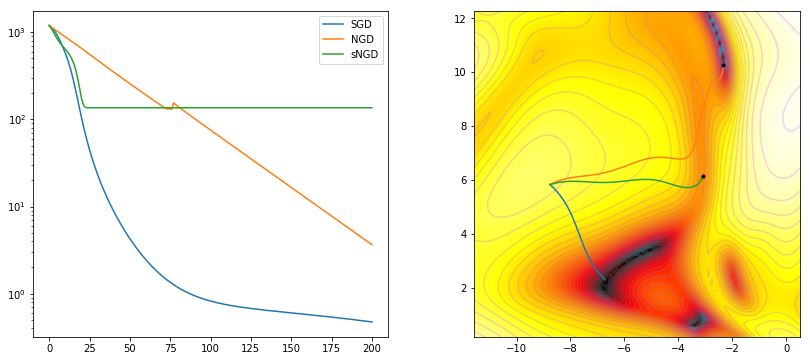

In [32]:
qs = [0.0, 1.0, 0.5 ]; lrs = np.array([0.0016, 0.06, 0.03 ])/4

eps = 0.1
seed = int(1e5*np.random.rand(1))

w0 = np.array([8,8]) + 8 * np.random.randn(2)

legend = print_str()
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


w0 =  [20.29524753  1.93577467]  lr =  [0.0002  0.0015  0.00075]  noise =  0.1  seed =  12216


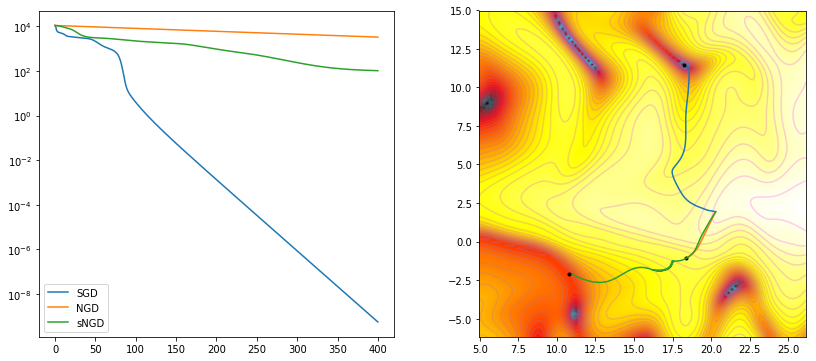

In [35]:
qs = [0.0, 1.0, 0.5]; lrs = np.array([0.0016*5, 0.06, 0.03])/40

eps = 0.1
seed = 12216
np.random.randn(4)
w0 = np.array([19.75939594,  1.23821689]) + 0.51 * np.random.randn(2)


legend = print_str()
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs,  iter = 400)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


w0 =  [16.30966758  0.20091803]  lr =  [0.0001   0.001875 0.001875]  noise =  0.1  seed =  2355


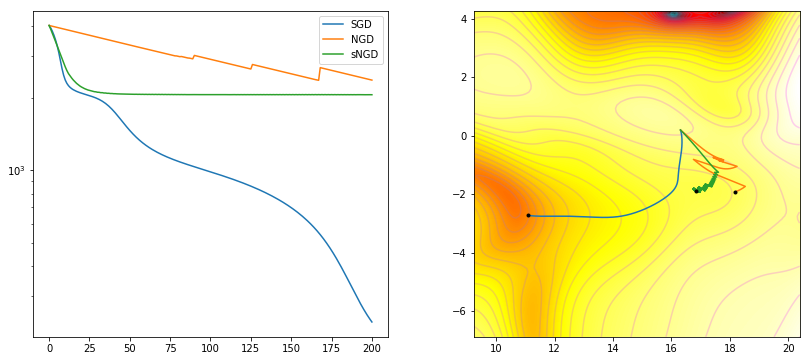

In [39]:
qs = [0.0, 1.0, 0.5]; lrs = np.array([0.0016, 0.06/2, 0.03])/4/4; 
seed = 2355;
eps = 0.1;

np.random.randn(3)
w0 = np.array([16.21833723,  0.08197838]) + 0.1 * np.random.randn(2)

legend = print_str()
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range, legend, plot_type = 'imshow')


w0 =  [17.09001307 -9.73028108]  lr =  [0.0004 0.015  0.0075]  noise =  0.1  seed =  12125


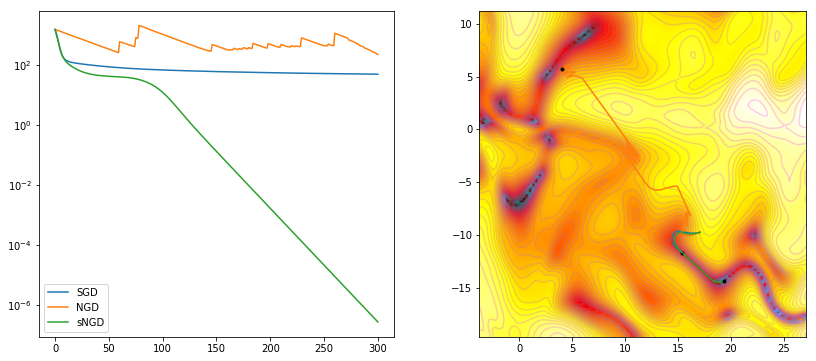

In [41]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.06, 0.03])/4
momentums = [0., 0., 0.]

eps = 0.1
seed = 12125

w0 = np.array([17.09001307, -9.73028108]) + 0 * np.random.randn(2)

legend = print_str()
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 300)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


w0 =  [37.91283903 32.23185338]  lr =  [5.00e-05 3.75e-03 6.25e-04]  noise =  0.1  seed =  27589


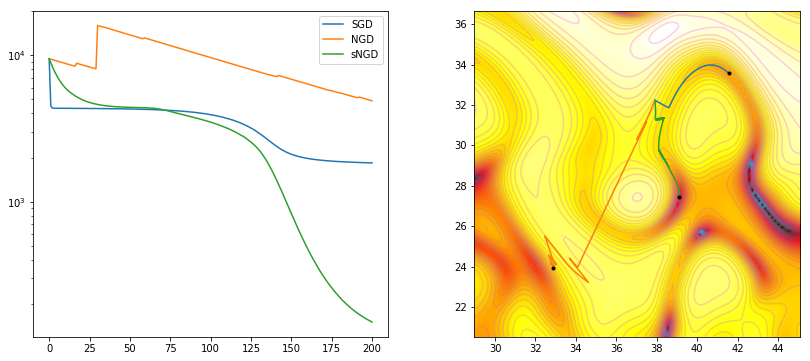

In [43]:
qs = [0.0, 1.0, 0.5]; lrs = np.array([0.0016/2, 0.06, 0.01])/4/4; momentums = None
eps = 0.1
seed = 27589
w0 = np.array([38.22005654, 26.39480292]) + 3 * np.random.randn(2)

legend = print_str()
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


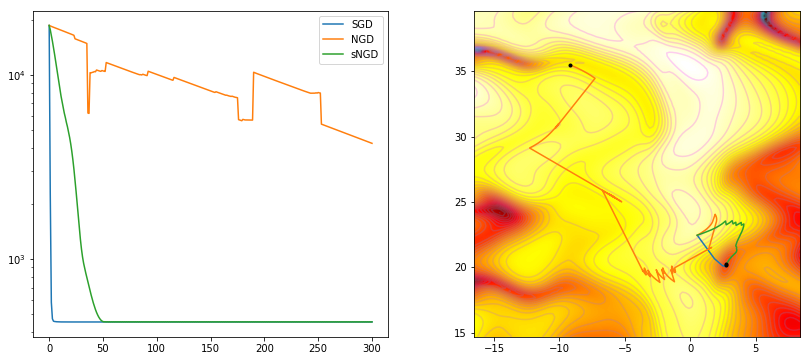

In [20]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0004*3, 0.002*5, 0.002*2*2])/4
momentums = [0., 0., 0.]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-5.48606167, 22.00820779])  + 10 * np.random.randn(2)

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 300)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


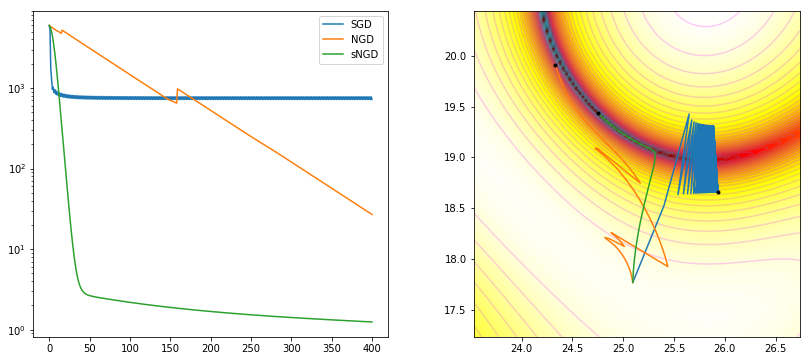

In [21]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0004*3, 0.002*3*10, 0.002*2*2])/4/2
momentums = [0., 0., 0.]

eps = 0.1
seed = 65071

w0 = np.array([25.09389783, 17.76844296]) 

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 400)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


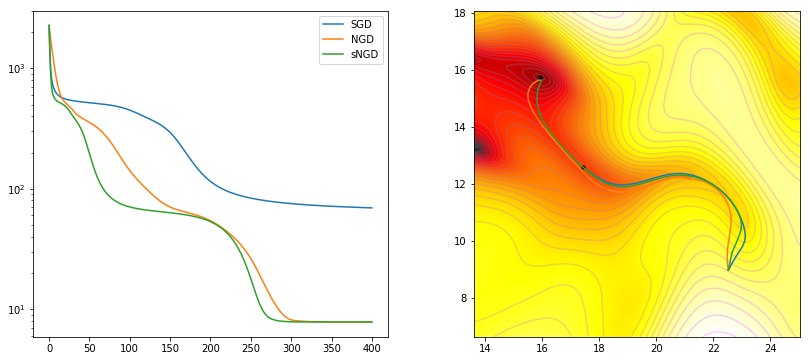

In [13]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0004*3, 0.002*3*2, 0.002*2*2])/4
momentums = [0., 0., 0.]

eps = 0.1
seed = 58371

w0 = np.array([22.52718249, 8.97167795]) 

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 400)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


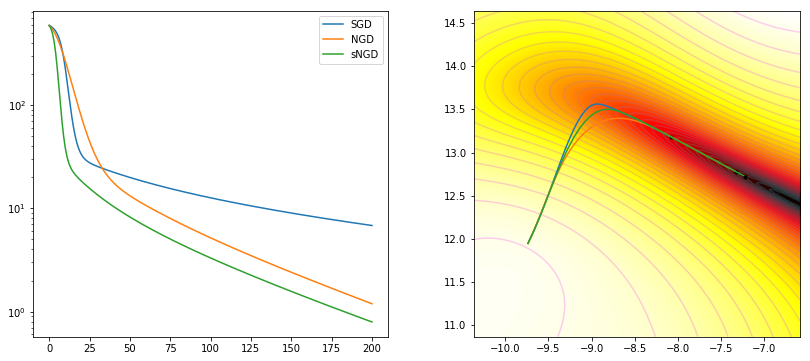

In [14]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
# lrs = np.array([0.0004*1.5, 0.002*3, 0.002*2])/4*2
lrs = np.array([0.0004*3, 0.002*3*2, 0.002*2*2])/4
# momentums = [0.8, 0.6, 0.6]
# momentums = [0.8, 0.8, 0.8]
momentums = [0., 0., 0.]

eps = 0.1
seed = int(1e5*np.random.rand(1))

w0 = np.array([8,8]) + 10 * np.random.randn(2)

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range,  legend , plot_type = 'imshow')


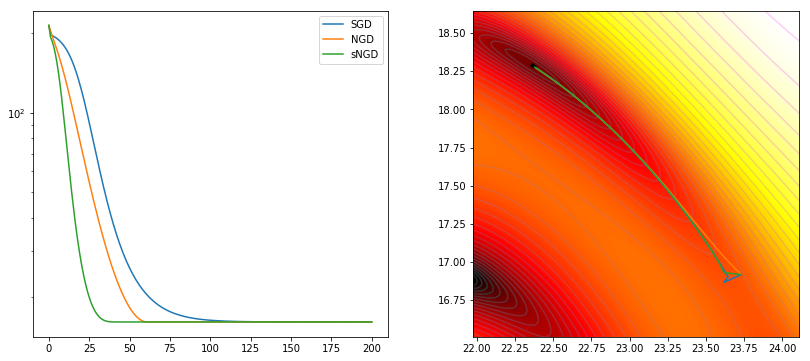

In [15]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
# lrs = np.array([0.0004*1.5, 0.002*3, 0.002*2])/4*2
lrs = np.array([0.0004*3, 0.002*3*2, 0.002*2*2])/4
# momentums = [0.8, 0.6, 0.6]
# momentums = [0.8, 0.8, 0.8]
momentums = [0., 0., 0.]

eps = 0.1
seed = int(1e5*np.random.rand(1))

w0 = np.array([8,8]) + 10 * np.random.randn(2)

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


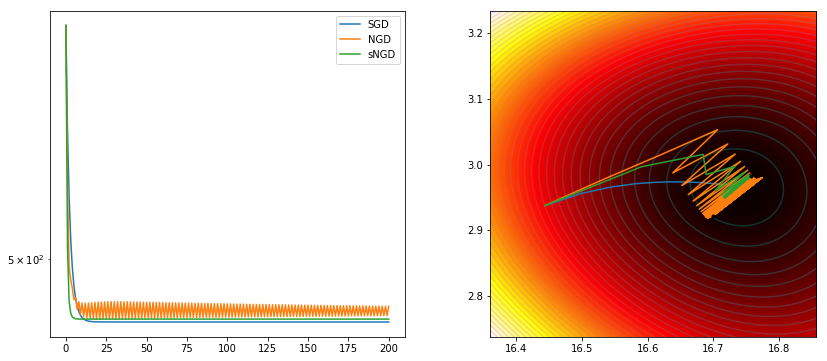

In [16]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
# lrs = np.array([0.0004*1.5, 0.002*3, 0.002*2])/4*2
lrs = np.array([0.0004*3, 0.002*3*2, 0.002*2*2])/4
# momentums = [0.8, 0.6, 0.6]
# momentums = [0.8, 0.8, 0.8]
momentums = [0., 0., 0.]

eps = 0.1
seed = int(1e5*np.random.rand(1))

w0 = np.array([8,8]) + 10 * np.random.randn(2)

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range,legend , plot_type = 'imshow')


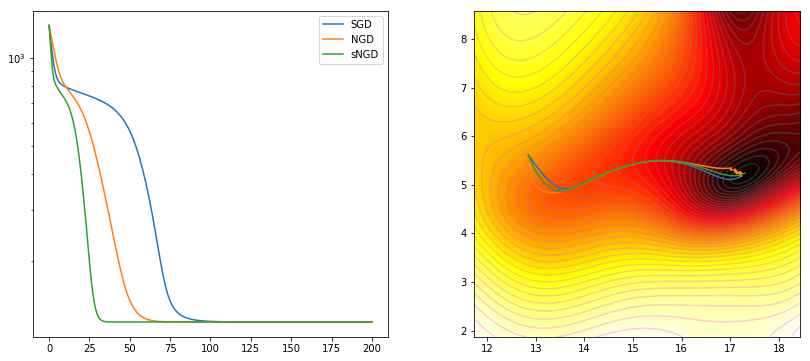

In [17]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
# lrs = np.array([0.0004*1.5, 0.002*3, 0.002*2])/4*2
lrs = np.array([0.0004*3, 0.002*3*2, 0.002*2*2])/4
# momentums = [0.8, 0.6, 0.6]
# momentums = [0.8, 0.8, 0.8]
momentums = [0., 0., 0.]

eps = 0.1
seed = int(1e5*np.random.rand(1))

w0 = np.array([8,8]) + 10 * np.random.randn(2)

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range,legend , plot_type = 'imshow')


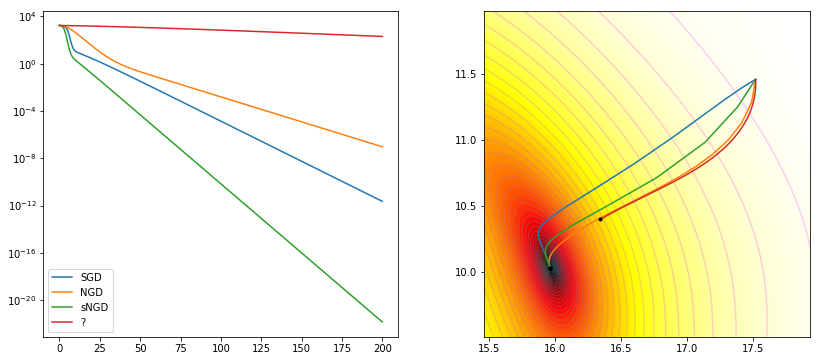

In [18]:
legend = ['SGD', 'NGD', 'sNGD', '?']; 
qs = [0.0, 1.0, 0.5, 1.5]; 
# lrs = np.array([0.0004*1.5, 0.002*3, 0.002*2])/4*2
lrs = np.array([0.0004*3, 0.002*3*2, 0.002*2*2, 0.002*2])/4
# momentums = [0.8, 0.6, 0.6]
# momentums = [0.8, 0.8, 0.8]
momentums = [0., 0., 0., 0.]

eps = 0.1
seed = int(1e5*np.random.rand(1))

w0 = np.array([8,8]) + 10 * np.random.randn(2)

fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, momentums, iter = 200)
plot_all (fnc, l_alls, w_alls, w_range, legend , plot_type = 'imshow')


w0 =  [-3.91917522 25.10133359] , eta =  [0.0001 0.0015 0.001 ] , noise =  0.1


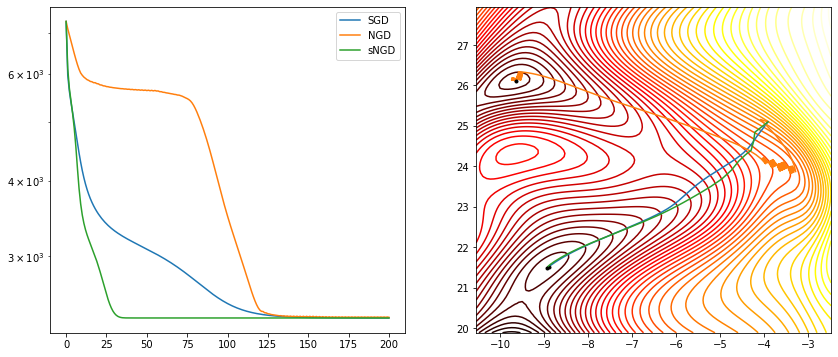

w0 =  [-1.13764719 27.87200615] , eta =  [0.0001 0.001  0.0015] , noise =  1


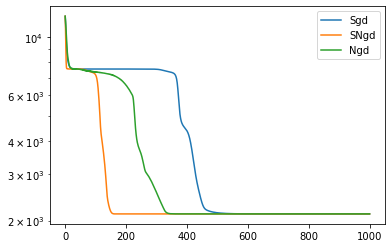

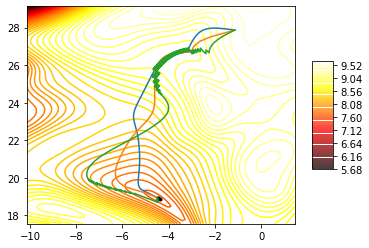

w0 =  [ 6.8991033  15.65617204] , eta =  [0.0001 0.001  0.0015] , noise =  0.1


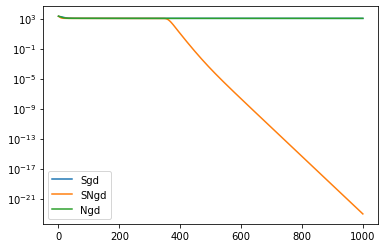

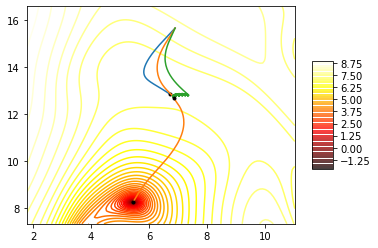

w0 =  [16.36694858 22.36929085] , eta =  [0.0001 0.001  0.0015] , noise =  2.5


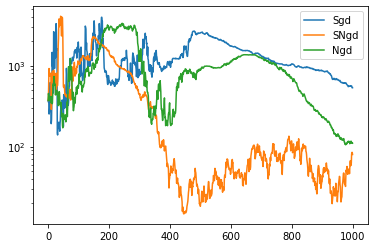

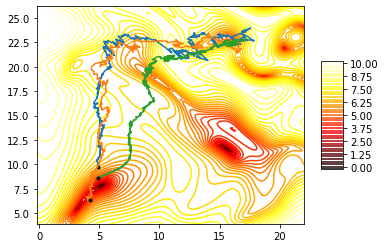

w0 =  [ 0.52976983 11.36431193] , eta =  [0.0001 0.0005 0.0005]


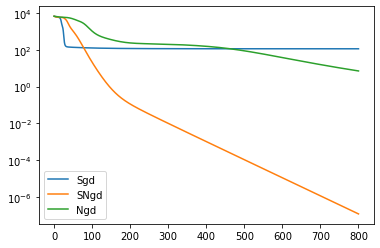

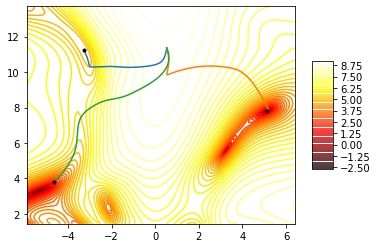

w0 =  [-7.44012266 21.69977817] , eta =  [0.0001 0.0005 0.0005]


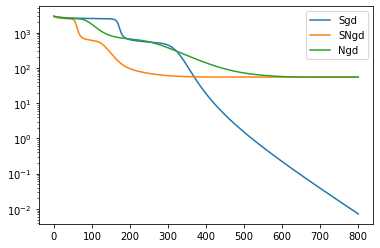

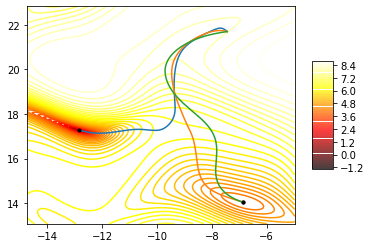

w0 =  [ 0.40562121 23.78269736] , eta =  [0.0001 0.0005 0.0005]


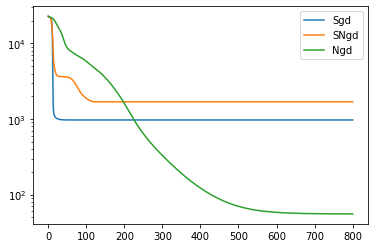

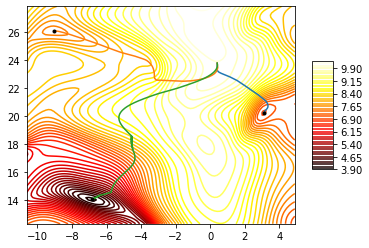

w0 =  [13.33652039 -4.89600544] , eta =  [0.0001 0.0005 0.0005]


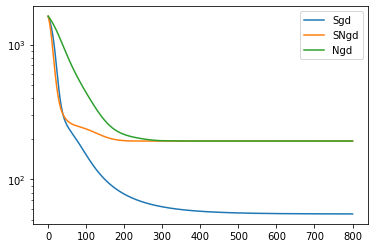

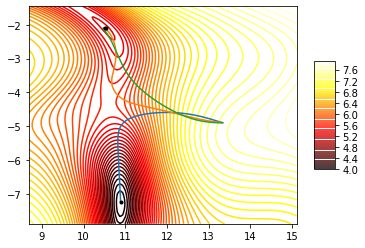